In [42]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [43]:
path = Path('assets', 'data', 'train_bigmart_data.csv')
train_data = pd.read_csv(path, header=0)
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [44]:
train_data.shape

(8523, 12)

In [45]:
train_data.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [46]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [47]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [48]:
train_data.loc[:,'Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [49]:
train_data.loc[:,'Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [50]:
train_data.loc[:,'Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [51]:
train_data.loc[:,'Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
0.134976      2
0.107224      2
0.085275      2
0.076856      2
0.059836      2
0.112203      2
0.044024      2
0.072253      2
0.061271      2
0.061164      2
0.145266      2
0.081097      2
0.071958      2
0.103442      2
0.074613      2
0.072655      2
0.071833      2
0.136286      2
0.041355      2
0.026950      2
0.013952      2
0.160624      2
0.080640      2
0.097611      2
0.096592      2
           ... 
0.100641      1
0.122735      1
0.099024      1
0.054600      1
0.118859      1
0.162572      1
0.076745      1
0.015461      1
0.057655      1
0.042113      1
0.029565      1
0.066447      1
0.035954      1
0.083222      1
0.021413      1
0.030921      1
0.081119      1
0.052811      1
0.118080      1
0.046654      1
0.021469      1
0.060134      1
0.096658      1
0.019064      1
0.164197      1
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, L

In [52]:
train_data.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [53]:
train_data.median()

Item_Weight                    12.600000
Item_Visibility                 0.053931
Item_MRP                      143.012800
Outlet_Establishment_Year    1999.000000
Item_Outlet_Sales            1794.331000
dtype: float64

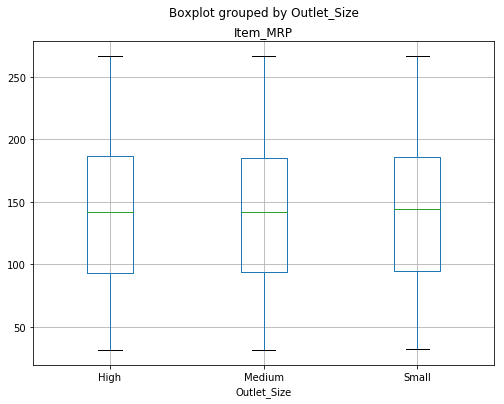

In [54]:
train_data.boxplot(column='Item_MRP', by='Outlet_Size', figsize=(8,6))


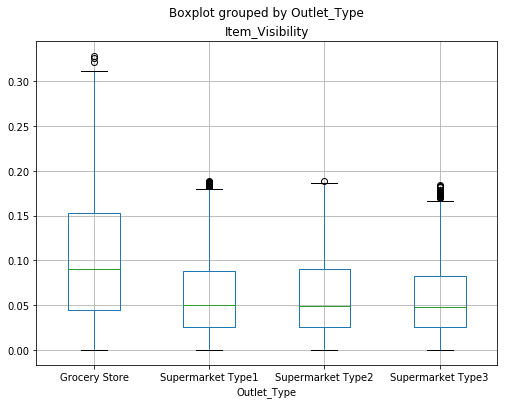

In [55]:
train_data.boxplot(column='Item_Visibility', by='Outlet_Type', figsize=(8,6))

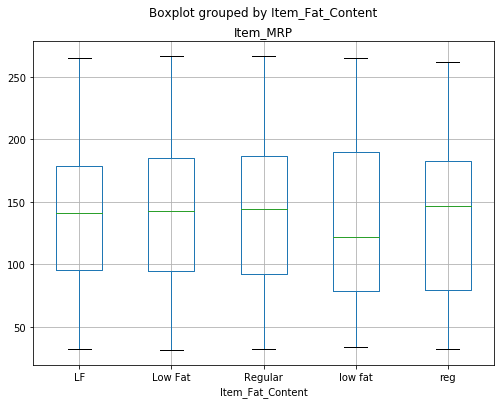

In [56]:
train_data.boxplot(column='Item_MRP', by='Item_Fat_Content', figsize=(8,6))

In [57]:
train_data['Outlet_Size'].mode()[0]

'Medium'

In [58]:
# fill the na for outlet size with medium
train_data['Outlet_Size'] = train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0])

In [59]:
# fill the na for item weight with the mean of weights
train_data['Item_Weight'] = train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())

In [60]:
print(train_data['Outlet_Size'].isnull().sum())

print(train_data['Item_Weight'].isnull().sum())

0
0


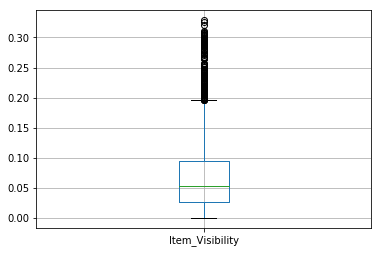

In [61]:
train_data.boxplot(column='Item_Visibility')

In [62]:
# delete the observations
Q1 = train_data['Item_Visibility'].quantile(0.25)
Q3 = train_data['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1
filter_train = train_data.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)')

In [63]:
filter_train.shape, train_data.shape

((8379, 12), (8523, 12))

In [64]:
filter_train['Item_Visibility']

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
5       0.000000
6       0.012741
7       0.127470
8       0.016687
9       0.094450
10      0.000000
11      0.045464
12      0.100014
13      0.047257
14      0.068024
15      0.069089
16      0.008596
17      0.069196
18      0.034238
19      0.102492
20      0.138190
21      0.035400
22      0.025698
23      0.057557
24      0.025896
25      0.099887
26      0.066693
27      0.019356
28      0.161467
29      0.072222
          ...   
8492    0.174350
8493    0.025886
8494    0.000000
8495    0.029567
8496    0.021696
8497    0.049209
8498    0.035293
8499    0.037574
8500    0.000000
8501    0.005998
8502    0.070712
8503    0.036133
8504    0.124111
8505    0.094146
8506    0.084676
8507    0.030242
8508    0.043246
8510    0.056862
8511    0.026980
8512    0.042801
8513    0.020407
8514    0.054489
8515    0.021518
8516    0.118661
8517    0.083607
8518    0.056783
8519    0.046982
8520    0.0351

In [65]:
train_data['Item_Visibility'].median()

0.05393093400000001

In [66]:
train_data = filter_train
train_data.shape

(8379, 12)

In [67]:
train_data['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.061425      2
0.074779      2
0.073562      2
0.112859      2
0.080766      2
0.097457      2
0.080969      2
0.076483      2
0.106539      2
0.078759      2
0.024756      2
0.107057      2
0.121250      2
0.037574      2
0.040912      2
0.037550      2
0.034868      2
0.159165      2
0.144338      2
0.059160      2
0.026818      2
0.037794      2
0.157076      2
0.086765      2
0.112682      2
0.085622      2
0.076792      2
0.074931      2
           ... 
0.009763      1
0.023135      1
0.042560      1
0.021240      1
0.076745      1
0.015461      1
0.057655      1
0.042113      1
0.029565      1
0.066447      1
0.035954      1
0.083222      1
0.021413      1
0.099024      1
0.030921      1
0.052811      1
0.118080      1
0.046654      1
0.021469      1
0.060134      1
0.096658      1
0.019064      1
0.164197      1
0.092576      1
0.115168      1
0.146896      1
0.081119      1
0.122735      1
0.100641      1
0.027617      1
Name: Item_Visibility, L

In [68]:
train_data['Item_Visibility_bins'] = pd.cut(train_data['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels=['Low Viz', 'Viz', 'High Viz'])

/Users/Meghna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')

/Users/Meghna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace('reg', 'Regular')

/Users/Meghna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
le = LabelEncoder()

In [72]:
train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [73]:
train_data['Item_Fat_Content'] = le.fit_transform(train_data['Item_Fat_Content'])

/Users/Meghna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
train_data['Item_Visibility'] = le.fit_transform(train_data['Item_Visibility'])

/Users/Meghna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
train_data['Outlet_Size'] = le.fit_transform(train_data['Outlet_Size'])

/Users/Meghna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
train_data['Outlet_Location_Type'] = le.fit_transform(train_data['Outlet_Location_Type'])

/Users/Meghna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [77]:
dummy = pd.get_dummies(train_data['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [78]:
train_data = pd.concat([train_data, dummy], axis=1)

In [80]:
train_data.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Weight,1.000000,-0.021636,-0.011174,0.025431,-0.008421,-0.007788,0.006004,0.009691,0.007492,-0.005084,0.000711,-0.000597
Item_Fat_Content,-0.021636,1.000000,0.051906,0.008048,0.003918,-0.000838,-0.002739,0.021670,-0.008920,0.003443,0.002876,0.000912
Item_Visibility,-0.011174,0.051906,1.000000,0.005004,-0.024570,0.031948,-0.011885,-0.062658,0.137800,-0.062043,-0.015300,-0.029843
Item_MRP,0.025431,0.008048,0.005004,1.000000,0.006896,0.004368,0.002638,0.577367,-0.005693,0.005560,0.004025,-0.006640
Outlet_Establishment_Year,-0.008421,0.003918,-0.024570,0.006896,1.000000,0.216979,-0.111056,-0.065382,-0.263397,0.232177,0.466983,-0.549453
Outlet_Size,-0.007788,-0.000838,0.031948,0.004368,0.216979,1.000000,-0.608219,-0.076552,0.186950,0.004279,-0.096809,-0.097219
Outlet_Location_Type,0.006004,-0.002739,-0.011885,0.002638,-0.111056,-0.608219,1.000000,0.087446,-0.033646,-0.492596,0.385721,0.387355
Item_Outlet_Sales,0.009691,0.021670,-0.062658,0.577367,-0.065382,-0.076552,0.087446,1.000000,-0.390714,0.085544,-0.045038,0.308155
Grocery Store,0.007492,-0.008920,0.137800,-0.005693,-0.263397,0.186950,-0.033646,-0.390714,1.000000,-0.501202,-0.125376,-0.125907
Supermarket Type1,-0.005084,0.003443,-0.062043,0.005560,0.232177,0.004279,-0.492596,0.085544,-0.501202,1.000000,-0.497889,-0.499999


In [79]:
train_data.corr()[((train_data.corr() < -0.85) | (train_data.corr() > 0.85)) & (train_data.corr() != 1)]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Fat_Content,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Outlet_Sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grocery Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Supermarket Type1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
train_data.dtypes

Item_Identifier                object
Item_Weight                   float64
Item_Fat_Content                int64
Item_Visibility                 int64
Item_Type                      object
Item_MRP                      float64
Outlet_Identifier              object
Outlet_Establishment_Year       int64
Outlet_Size                     int64
Outlet_Location_Type            int64
Outlet_Type                    object
Item_Outlet_Sales             float64
Item_Visibility_bins         category
Grocery Store                   uint8
Supermarket Type1               uint8
Supermarket Type2               uint8
Supermarket Type3               uint8
dtype: object

In [83]:
train_data = train_data.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], axis=1)

In [84]:
train_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.300000,0,664,249.8092,1999,1,0,3735.1380,Low Viz,0,1,0,0
1,5.920000,1,880,48.2692,2009,1,2,443.4228,Low Viz,0,0,1,0
2,17.500000,0,715,141.6180,1999,1,0,2097.2700,Low Viz,0,1,0,0
3,19.200000,1,0,182.0950,1998,1,2,732.3800,NaN,1,0,0,0
4,8.930000,0,0,53.8614,1987,0,2,994.7052,NaN,0,1,0,0
5,10.395000,1,0,51.4008,2009,1,2,556.6088,NaN,0,0,1,0
6,13.650000,1,395,57.6588,1987,0,2,343.5528,Low Viz,0,1,0,0
7,12.857645,0,6771,107.7622,1985,1,2,4022.7636,Viz,0,0,0,1
8,16.200000,1,707,96.9726,2002,1,1,1076.5986,Low Viz,0,1,0,0
9,19.200000,1,5781,187.8214,2007,1,1,4710.5350,Viz,0,1,0,0


In [85]:
train_data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Item_Outlet_Sales', 'Item_Visibility_bins', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [86]:
train_data.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Weight,1.000000,-0.021636,-0.011174,0.025431,-0.008421,-0.007788,0.006004,0.009691,0.007492,-0.005084,0.000711,-0.000597
Item_Fat_Content,-0.021636,1.000000,0.051906,0.008048,0.003918,-0.000838,-0.002739,0.021670,-0.008920,0.003443,0.002876,0.000912
Item_Visibility,-0.011174,0.051906,1.000000,0.005004,-0.024570,0.031948,-0.011885,-0.062658,0.137800,-0.062043,-0.015300,-0.029843
Item_MRP,0.025431,0.008048,0.005004,1.000000,0.006896,0.004368,0.002638,0.577367,-0.005693,0.005560,0.004025,-0.006640
Outlet_Establishment_Year,-0.008421,0.003918,-0.024570,0.006896,1.000000,0.216979,-0.111056,-0.065382,-0.263397,0.232177,0.466983,-0.549453
Outlet_Size,-0.007788,-0.000838,0.031948,0.004368,0.216979,1.000000,-0.608219,-0.076552,0.186950,0.004279,-0.096809,-0.097219
Outlet_Location_Type,0.006004,-0.002739,-0.011885,0.002638,-0.111056,-0.608219,1.000000,0.087446,-0.033646,-0.492596,0.385721,0.387355
Item_Outlet_Sales,0.009691,0.021670,-0.062658,0.577367,-0.065382,-0.076552,0.087446,1.000000,-0.390714,0.085544,-0.045038,0.308155
Grocery Store,0.007492,-0.008920,0.137800,-0.005693,-0.263397,0.186950,-0.033646,-0.390714,1.000000,-0.501202,-0.125376,-0.125907
Supermarket Type1,-0.005084,0.003443,-0.062043,0.005560,0.232177,0.004279,-0.492596,0.085544,-0.501202,1.000000,-0.497889,-0.499999


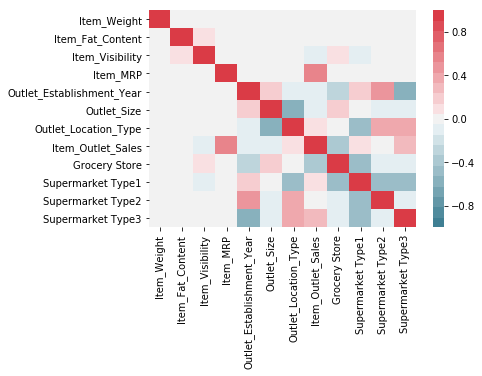

In [87]:
ax = sns.heatmap(
    train_data.corr(),
    vmin=-1, vmax=1, # Make the scale span -1 to 1
    cmap=sns.diverging_palette(220, 10, n=21), # Use a diverging blue-red scale with 21 levels
)